In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train =pd.read_csv("train_houseprice.csv")
test =pd.read_csv("test_houseprice.csv")
train_ID=train["Id"]
test_ID=test["Id"]
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

In [4]:
train.shape,test.shape

((1460, 80), (1459, 79))

# Quelques statistiques descriptives

In [5]:
train.select_dtypes(exclude='object').describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.select_dtypes(include='object').describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


# Normalité de la cible

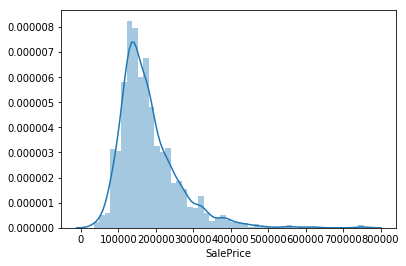

In [7]:
sns.distplot(train["SalePrice"])

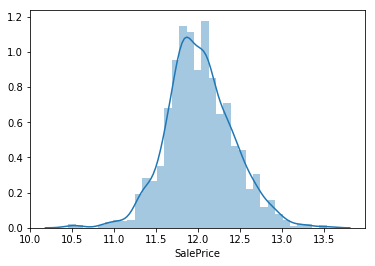

In [8]:
sns.distplot(np.log(train["SalePrice"]))

# Corrélation par rapport à la cible

In [9]:
corr=train.corr()["SalePrice"].sort_values(ascending=False)
corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

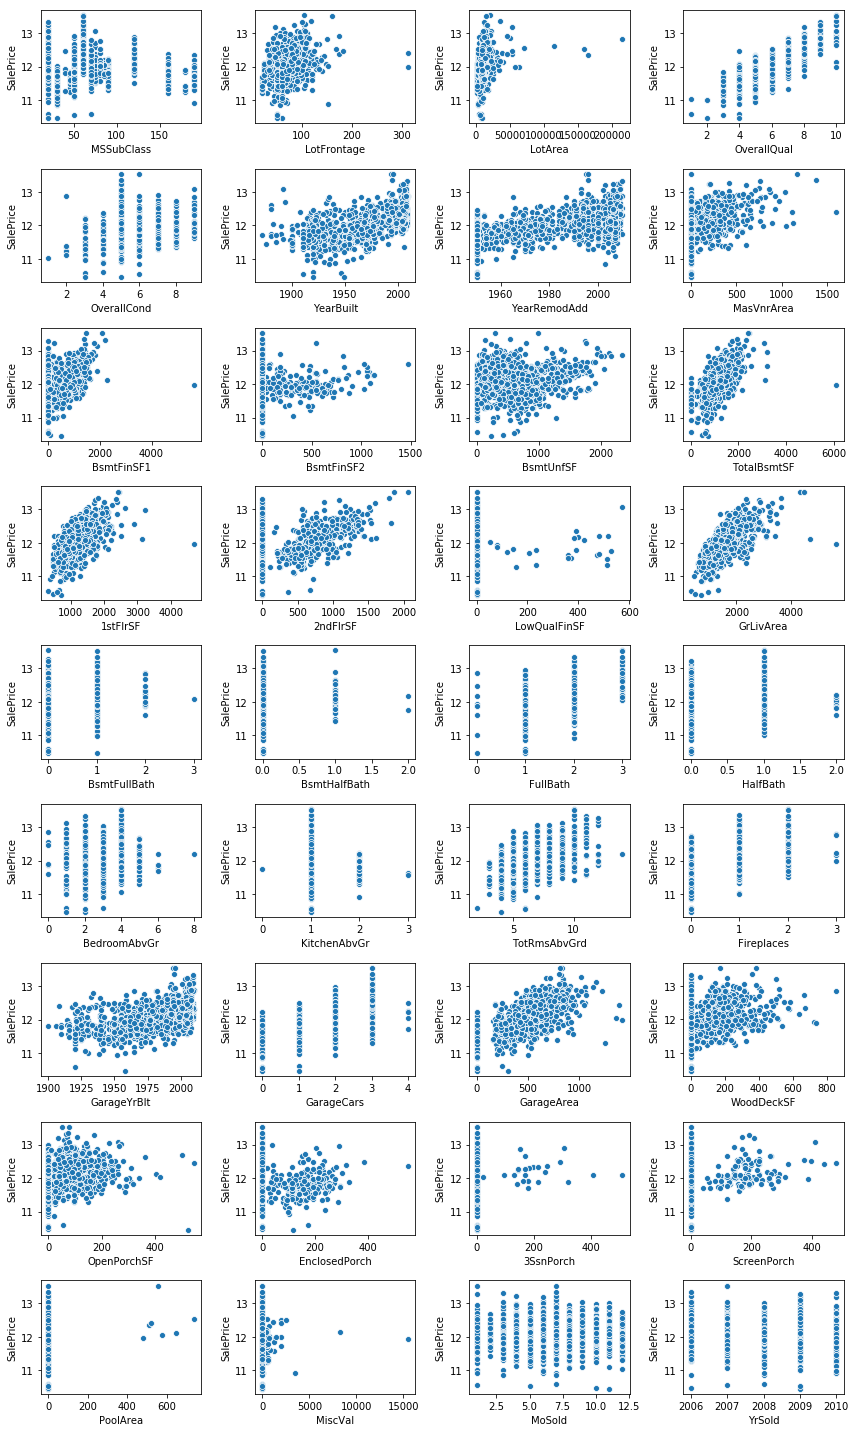

In [10]:
num_attributes=train.select_dtypes(exclude='object').drop('SalePrice',axis=1).copy()
f = plt.figure(figsize=(12,20))

for i in range(len(num_attributes.columns)):
    f.add_subplot(9,4,i+1)
    sns.scatterplot(num_attributes.iloc[:,i],np.log1p(train['SalePrice']))
    
plt.tight_layout()
plt.show()

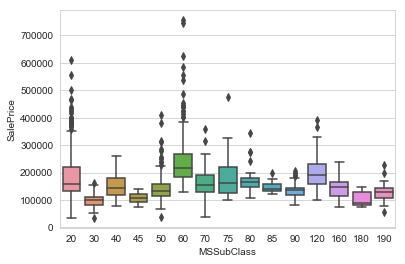

In [11]:
sns.set_style("whitegrid")
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = train) 

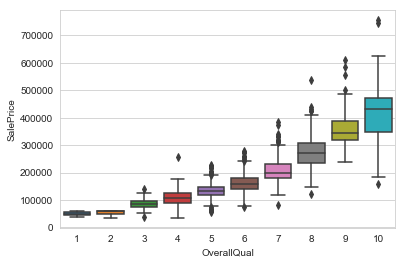

In [12]:
sns.boxplot(train['OverallQual'], train['SalePrice'])

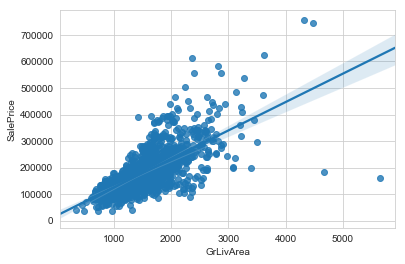

In [13]:
sns.regplot(train['GrLivArea'], train['SalePrice'])

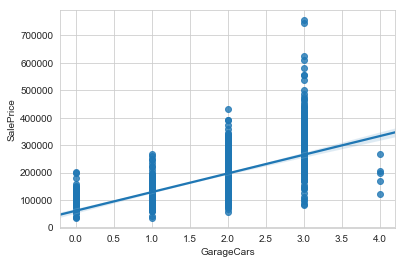

In [14]:
sns.regplot(train["GarageCars"],train["SalePrice"])

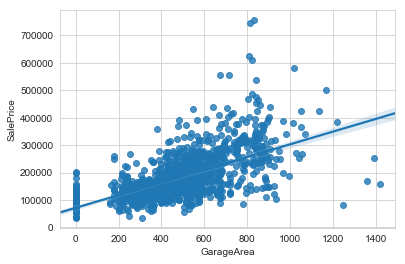

In [15]:
sns.regplot(train["GarageArea"],train["SalePrice"])

In [16]:
data=pd.concat([(train.drop("SalePrice",axis=1)),test])

# Traitement des valeurs manquantes

In [17]:
val_manq_perctg=(((data.isnull().sum()[data.isnull().sum()>0])/len(data))*100).sort_values(ascending=False)

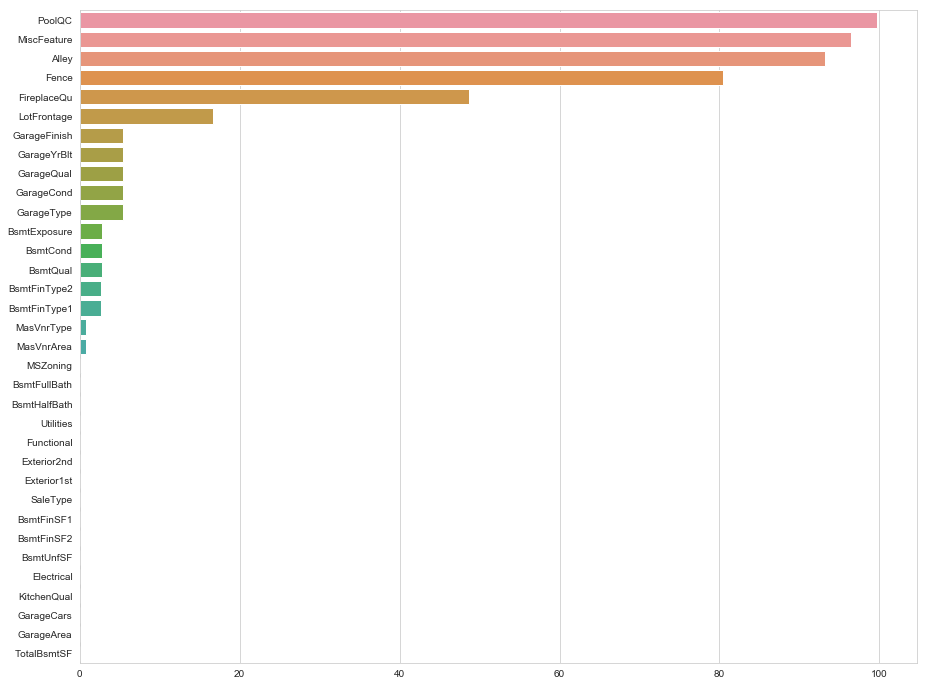

In [18]:
plt.figure(figsize=(15,12))
sns.barplot(val_manq_perctg,val_manq_perctg.keys())

In [19]:
val_manq=data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending=False)
miss_data=pd.concat([val_manq,val_manq_perctg],axis=1,keys=["valeurs manquants total","pouçentage"])

In [20]:
miss_data

,valeurs manquants total,pouçentage
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageFinish,159,5.447071
GarageYrBlt,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071


In [21]:
for col in('GarageQual','GarageFinish','GarageYrBlt','GarageType','GarageCond'):
    data[col].fillna("None",inplace=True)

In [22]:
for col in('GarageCars','GarageArea'):
    data[col].fillna(0,inplace=True)

In [23]:
data[(data['TotalBsmtSF']>0) & (data['BsmtCond'].isnull())][['TotalBsmtSF','BsmtCond']]

,TotalBsmtSF,BsmtCond
580,1426.0,NaN
725,1127.0,NaN
1064,995.0,NaN


In [24]:
for i in (580,725,1064):
    data.loc[data.index==i,"BsmtCond"]=data['BsmtCond'].mode()[0]

In [25]:
data[(data['TotalBsmtSF']>0) & (data['BsmtQual'].isnull())][['TotalBsmtSF','BsmtQual']]

,TotalBsmtSF,BsmtQual
757,173.0,NaN
758,356.0,NaN


In [26]:
for i in (757,758):
    data.loc[data.index==i,"BsmtQual"]=data['BsmtQual'].mode()[0]

In [27]:
data[(data['TotalBsmtSF']>0) & (data['BsmtExposure'].isnull())][['TotalBsmtSF','BsmtExposure']]

,TotalBsmtSF,BsmtExposure
948,936.0,NaN
27,1595.0,NaN
888,725.0,NaN


In [28]:
for i in (948,27,888):
    data.loc[data.index==i,"BsmtExposure"]=data['BsmtExposure'].mode()[0]

In [29]:
data[(data['TotalBsmtSF']>0) & (data['BsmtFinType2'].isnull())][['TotalBsmtSF','BsmtFinType2']]

,TotalBsmtSF,BsmtFinType2
332,3206.0,NaN


In [30]:
data.loc[data.index==332,"BsmtFinType2"]=data['BsmtFinType2'].mode()[0]

In [31]:
for col in ("BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"):
    data[col].fillna("None",inplace=True)

In [32]:
data[(data['BsmtFullBath'].isnull())][['TotalBsmtSF','BsmtFullBath','BsmtQual']]

,TotalBsmtSF,BsmtFullBath,BsmtQual
660,NaN,NaN,None
728,0.0,NaN,None


In [33]:
data[(data['BsmtHalfBath'].isnull())][['TotalBsmtSF','BsmtHalfBath','BsmtQual']]

,TotalBsmtSF,BsmtHalfBath,BsmtQual
660,NaN,NaN,None
728,0.0,NaN,None


In [34]:
data["BsmtHalfBath"].fillna(0,inplace=True)
data["BsmtFullBath"].fillna(0,inplace=True)

In [35]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [36]:
NULL_significatif=["Alley", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"]
for col in NULL_significatif:
    data[col].fillna("None",inplace=True)

In [37]:
data['MasVnrArea'].fillna(data['MasVnrArea'].median(),inplace=True)
data['MasVnrType'].fillna(data['MasVnrType'].mode()[0],inplace=True)

In [38]:
data[(data["TotalBsmtSF"].isnull())][["TotalBsmtSF","BsmtQual","BsmtCond"]]

,TotalBsmtSF,BsmtQual,BsmtCond
660,NaN,None,None


In [39]:
data["TotalBsmtSF"].fillna(0,inplace=True)

In [40]:
x=["MSZoning","Functional","SaleType","KitchenQual","Electrical","BsmtUnfSF","BsmtFinSF2","BsmtFinSF1","Exterior2nd","Exterior1st"]
for col in x:
    try:
        data[col].fillna(data[col].median(),inplace=True)
    except:
        data[col].fillna(data[col].mode()[0],inplace=True)

In [41]:
data.drop("Utilities",axis=1,inplace=True)

# Traitement des valeurs catégorielles nominales

In [42]:
data = data.replace({"MSSubClass" : {20 : "Class20", 30 : "Class30", 40 : "Class40", 45 : "Class45", 
                                       40 : "Class50", 60 : "Class60", 70 : "Class70", 75 : "Class75", 
                                       80 : "Class80", 85 : "Class85", 90 : "Class90", 120: "Class120", 
                                       150 : "Class150", 160 : "Class160", 180 : "Class180", 190 : "Class190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

data = data.replace({
                       "CentralAir" : {"Y" : 1, "N" : 0},
                       "BsmtCond" : {"No" : 0,"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0,"NA" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"NA" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"NA" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"NA" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2}}
                     )

# Retouches avant la prédiction

In [43]:
X_train=pd.get_dummies(data).iloc[:train.shape[0]]
X_test=pd.get_dummies(data).iloc[train.shape[0]:]

In [44]:
X_train.shape,X_test.shape

((1460, 400), (1459, 400))

In [45]:
X_train.head()

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2,4,3,7,5,2003,2003,196.0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,2,4,3,6,8,1976,1976,0.0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,2,3,3,7,5,2001,2002,162.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,2,3,3,7,5,1915,1970,0.0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,2,3,3,8,5,2000,2000,350.0,...,0,0,0,1,0,0,0,0,1,0


In [46]:
from sklearn.model_selection import cross_val_score
def return_rmse(model):
    return np.sqrt(-cross_val_score(model, X_train, np.log1p(train["SalePrice"]), cv=5, scoring="neg_mean_squared_error")).mean()

# Phase de prédiction

In [47]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import Lasso, RidgeCV, ElasticNet,Ridge,Lars
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

classifiers=[
    Ridge(alpha=15),
    Lasso(alpha=0.0005),
    ElasticNet(alpha=0.01,l1_ratio=0.1),
    RidgeCV(cv=10),
    RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
    XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=5, min_child_weight=4, missing=None, n_estimators=500,
       n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.7)
    ]

for col in classifiers:
    clf = col
    clf.fit(X_train, np.log1p(train["SalePrice"]))
    print(col)
    print('Score : ',return_rmse(clf))
    print('*'*50)

Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Score :  0.1389595806591696
**************************************************
Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Score :  0.1358674892365292
**************************************************
ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Score :  0.1403225415666837
**************************************************
RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarn

Score :  0.1393940295904196
**************************************************
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Score :  0.1459184347467303
**************************************************
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=5, min_child_weight=4, missing=None, n_estimators=500,
       n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.7)
Score :  0.1225040677898643
***********************************************

In [48]:
xgb=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=5, min_child_weight=4, missing=None, n_estimators=500,
       n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.7)
xgb.fit(X_train, np.log1p(train["SalePrice"]))
predict = xgb.predict(X_test)

predict= np.expm1(predict)

tst=pd.read_csv("test_houseprice.csv")

submission = pd.DataFrame({
        "Id": tst["Id"],
        "SalePrice": predict
    })

submission.to_csv("prices__f.csv", index=False)